# <h> Exploratory Data Analysis on MARVEL Dataset </h>

In [23]:
#All the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('/kaggle/input/MARVEL/Marvel.xlsx')


In [8]:
#View the Data
df.head()

,Phase,Title,Cast,Director,Movie/Show,Released on,Released (Year),Released at theatre/TV,Runtime,Budget (in million),Overall Sales,Post Credit Scene,Stanlee Cameo,Audience Rating,Rating on rotten tomatoes
0,1,Iron man,"\nRobert Downey Jr.,\nTerrence Howard,\nJeff ...",Mary fergus & Hawk Ostby,Movie,2002-05-01,2008,Theatre,126.0,140,585.8,Yes,Yes,0.91,0.94
1,1,The incredible Hulk,"\nEdward Norton,\nLiv Tyler,\nTim Roth,\nWill...",Zak Penn,Movie,2013-06-01,2008,Theatre,112.0,137.5–150,264.8,Yes,Yes,0.69,0.67
2,1,iron man 2,"\nRobert Downey Jr.,\nGwyneth Paltrow,\nDon C...",Justin theorux,Movie,2007-05-01,2010,Theatre,125.0,170–200,623.9,Yes,Yes,0.71,0.73
3,1,Thor,"\nChris Hemsworth,\nNatalie Portman,\nTom Hid...",Ashley Edward & Zavk stentz,Movie,2006-05-01,2011,Theatre,114.0,150,449.3,Yes,Yes,0.76,0.77
4,1,Captain America: the first avenger,"\nChris Evans,\nTommy Lee Jones,\nHugo Weavin...",Christopher markus & Stephen Mcfeely,Movie,2022-07-01,2011,Theatre,124.0,140,370.6,Yes,Yes,0.75,0.8


## Basic Information about the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Phase                      60 non-null     int64         
 1   Title                      60 non-null     object        
 2   Cast                       58 non-null     object        
 3   Director                   58 non-null     object        
 4   Movie/Show                 60 non-null     object        
 5   Released on                53 non-null     datetime64[ns]
 6   Released (Year)            60 non-null     int64         
 7   Released at theatre/TV     60 non-null     object        
 8   Runtime                    43 non-null     float64       
 9   Budget (in million)        30 non-null     object        
 10  Overall Sales              30 non-null     object        
 11  Post Credit Scene          43 non-null     object        
 12  Stanlee Ca

In [10]:
df.describe()

,Phase,Released (Year),Runtime,Audience Rating
count,60.000000,60.000000,43.000000,43.000000
mean,3.450000,2018.716667,102.000000,0.811395
std,1.511818,4.871542,49.478471,0.146638
min,1.000000,2008.000000,8.000000,0.330000
25%,2.000000,2014.750000,48.250000,0.770000
50%,4.000000,2021.000000,124.000000,0.850000
75%,5.000000,2023.000000,134.000000,0.905000
max,6.000000,2026.000000,181.000000,0.980000


In [21]:
df.dtypes

Phase                         int64
Title                        object
Cast                         object
Director                     object
Movie/Show                   object
Released on                  object
Released (Year)               int64
Released at theatre/TV       object
Runtime                      object
Budget (in million)          object
Overall Sales                object
Post Credit Scene            object
Stanlee Cameo                object
Audience Rating              object
Rating on rotten tomatoes    object
dtype: object

## Duplicate & Unique Values

In [15]:
#Total duplicate values
print("Dupicate Values:", df.duplicated().sum())

#Total unique values
print("Unique Values:", df['Title'].nunique())


Dupicate Values: 0
Unique Values: 60


## Find null values and replace them

In [17]:
df.isnull().sum()

Phase                         0
Title                         0
Cast                          2
Director                      2
Movie/Show                    0
Released on                   7
Released (Year)               0
Released at theatre/TV        0
Runtime                      17
Budget (in million)          30
Overall Sales                30
Post Credit Scene            17
Stanlee Cameo                17
Audience Rating              17
Rating on rotten tomatoes    17
dtype: int64

In [18]:
df.replace(np.nan,'0',inplace = True)

In [19]:
df.isnull().sum()

Phase                        0
Title                        0
Cast                         0
Director                     0
Movie/Show                   0
Released on                  0
Released (Year)              0
Released at theatre/TV       0
Runtime                      0
Budget (in million)          0
Overall Sales                0
Post Credit Scene            0
Stanlee Cameo                0
Audience Rating              0
Rating on rotten tomatoes    0
dtype: int64

## Filter the data

In [22]:
#returned the phase 1 movies only
df[df['Phase']==1].head()

,Phase,Title,Cast,Director,Movie/Show,Released on,Released (Year),Released at theatre/TV,Runtime,Budget (in million),Overall Sales,Post Credit Scene,Stanlee Cameo,Audience Rating,Rating on rotten tomatoes
0,1,Iron man,"\nRobert Downey Jr.,\nTerrence Howard,\nJeff ...",Mary fergus & Hawk Ostby,Movie,2002-05-01 00:00:00,2008,Theatre,126.0,140,585.8,Yes,Yes,0.91,0.94
1,1,The incredible Hulk,"\nEdward Norton,\nLiv Tyler,\nTim Roth,\nWill...",Zak Penn,Movie,2013-06-01 00:00:00,2008,Theatre,112.0,137.5–150,264.8,Yes,Yes,0.69,0.67
2,1,iron man 2,"\nRobert Downey Jr.,\nGwyneth Paltrow,\nDon C...",Justin theorux,Movie,2007-05-01 00:00:00,2010,Theatre,125.0,170–200,623.9,Yes,Yes,0.71,0.73
3,1,Thor,"\nChris Hemsworth,\nNatalie Portman,\nTom Hid...",Ashley Edward & Zavk stentz,Movie,2006-05-01 00:00:00,2011,Theatre,114.0,150,449.3,Yes,Yes,0.76,0.77
4,1,Captain America: the first avenger,"\nChris Evans,\nTommy Lee Jones,\nHugo Weavin...",Christopher markus & Stephen Mcfeely,Movie,2022-07-01 00:00:00,2011,Theatre,124.0,140,370.6,Yes,Yes,0.75,0.8


## Plot Data

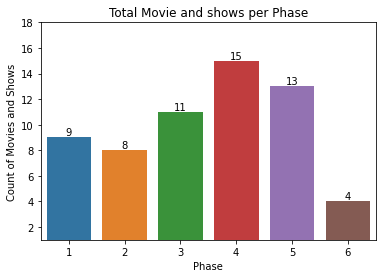

In [40]:
grouped = df.groupby("Phase").count()

ax = sns.barplot(x=grouped.index, y=grouped['Title'])
plt.ylim(1, 18)

plt.title("Total Movie and shows per Phase")
plt.xlabel("Phase")
plt.ylabel("Count of Movies and Shows")

for i in ax.containers:
    ax.bar_label(i)

plt.show()


In [56]:
print("Total directors:", df['Director'].nunique())

# Total number of movies
movies = df[df['Movie/Show'] == 'Movie'].shape[0]

# Total number of shows
shows = df[df['Movie/Show'] == 'Show'].shape[0]

print("Number of Movies:", movies)
print("Number of Shows:", shows)


Total directors: 42
Number of Movies: 40
Number of Shows: 15
